In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv("taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [4]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [5]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [6]:
df.shape

(1000, 11)

#### Handling Null Values 

In [7]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    df[col].fillna(df[col].mean(),inplace=True)

C:\Users\behli\AppData\Local\Temp\ipykernel_23400\1398703341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [8]:
cat_cols = [
    'Time_of_Day',
    'Day_of_Week',
    'Traffic_Conditions',
    'Weather'
]

for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\behli\AppData\Local\Temp\ipykernel_23400\1509565742.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [9]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [10]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000


In [11]:
df['Trip_Distance_km'] = df['Trip_Distance_km'].round().astype(int)
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].round().astype(int)
df['Passenger_Count'] = df['Passenger_Count'].astype(int)

In [12]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19,Morning,Weekday,3,Low,Clear,3.560000,0.80,0.32,54,36.262400
1,48,Afternoon,Weekday,1,High,Clear,3.502989,0.62,0.43,41,56.874773
2,37,Evening,Weekend,1,High,Clear,2.700000,1.21,0.15,37,52.903200
3,30,Evening,Weekday,4,Low,Clear,3.480000,0.51,0.15,117,36.469800
4,27,Evening,Weekday,3,High,Clear,2.930000,0.63,0.32,23,15.618000


In [13]:
df['Traffic_Conditions'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [14]:
encoder = OneHotEncoder(categories=[['Morning', 'Evening', 'Afternoon', 'Night']])
encoded = encoder.fit_transform(df[['Time_of_Day']]).toarray()
time = pd.DataFrame(encoded,columns = encoder.get_feature_names_out())

In [15]:
df = pd.concat([df.reset_index(drop=True),time.reset_index(drop=True)],axis=1)

In [16]:
df.drop('Time_of_Day',axis=1,inplace=True)

In [17]:
encoder_day  = OneHotEncoder(categories=[['Weekday', 'Weekend']])
encoded_day = encoder_day.fit_transform(df[['Day_of_Week']]).toarray()
day_week = pd.DataFrame(encoded_day,columns = encoder_day.get_feature_names_out())

In [18]:
df = pd.concat([df.reset_index(drop=True),day_week.reset_index(drop=True)],axis=1)

In [19]:
df.drop('Day_of_Week',axis=1,inplace=True)

In [20]:
df.head()

,Trip_Distance_km,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Morning,Time_of_Day_Evening,Time_of_Day_Afternoon,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend
0,19,3,Low,Clear,3.560000,0.80,0.32,54,36.262400,1.0,0.0,0.0,0.0,1.0,0.0
1,48,1,High,Clear,3.502989,0.62,0.43,41,56.874773,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1,High,Clear,2.700000,1.21,0.15,37,52.903200,0.0,1.0,0.0,0.0,0.0,1.0
3,30,4,Low,Clear,3.480000,0.51,0.15,117,36.469800,0.0,1.0,0.0,0.0,1.0,0.0
4,27,3,High,Clear,2.930000,0.63,0.32,23,15.618000,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
df['Traffic_Conditions'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [22]:
df['Weather'].unique()

array(['Clear', 'Rain', 'Snow'], dtype=object)

In [23]:
encoder_con  = OneHotEncoder(categories=[['Low', 'High', 'Medium']])
encoded_con = encoder_con.fit_transform(df[['Traffic_Conditions']]).toarray()
condition = pd.DataFrame(encoded_con,columns = encoder_con.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True),condition.reset_index(drop=True)],axis=1)

In [24]:
encoder_wet  = OneHotEncoder(categories=[['Clear', 'Rain', 'Snow']])
encoded_wet = encoder_wet.fit_transform(df[['Weather']]).toarray()
weather = pd.DataFrame(encoded_wet,columns = encoder_wet.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True),weather.reset_index(drop=True)],axis=1)

In [25]:
df.drop(columns=['Traffic_Conditions','Weather'],axis=1,inplace=True)

In [26]:
df['Trip_price'] = df['Trip_Price']

In [27]:
df.head()
df.drop('Trip_Price',axis=1,inplace=True)

#### Spliting Data set

In [ ]:
X = df.iloc[:,:-1]
y = df['Trip_price']


In [44]:
np.array(X)
np.array(y)

array([ 36.2624    ,  56.87477333,  52.9032    ,  36.4698    ,
        15.618     ,  60.2028    ,  11.2645    , 101.1216    ,
        56.87477333,  75.5657    ,  14.892     ,  56.87477333,
        88.1328    ,  36.118     ,  28.9914    ,  27.4415    ,
        56.716     ,  69.0049    ,  69.6268    ,  27.3543    ,
        44.7782    ,  26.2988    , 201.86950919,  39.2366    ,
        33.632     ,  83.6965    ,  28.2443    , 280.87730155,
        64.7971    ,  24.2608    ,  58.8121    ,  20.7765    ,
        56.87477333,  57.28      ,  61.5552    ,  54.1018    ,
        35.0164    ,  40.9225    ,  60.0471    ,  62.7785    ,
        20.791     ,  57.0482    ,  42.9921    ,  85.884     ,
        29.4758    ,  30.9982    ,  64.0553    ,  44.844     ,
        44.1197    ,  20.1596    , 104.1764    ,  57.0766    ,
        98.3796    ,  41.9343    ,  72.2695    ,  99.8989    ,
        10.2366    ,  32.342     ,  37.1504    ,  78.715     ,
        29.8609    ,  59.181     ,  47.3148    ,  69.65

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [46]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [48]:
y_pred=regression.predict(X_test)

In [49]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

303.12760216736217
10.33874891345741
17.41056007621128


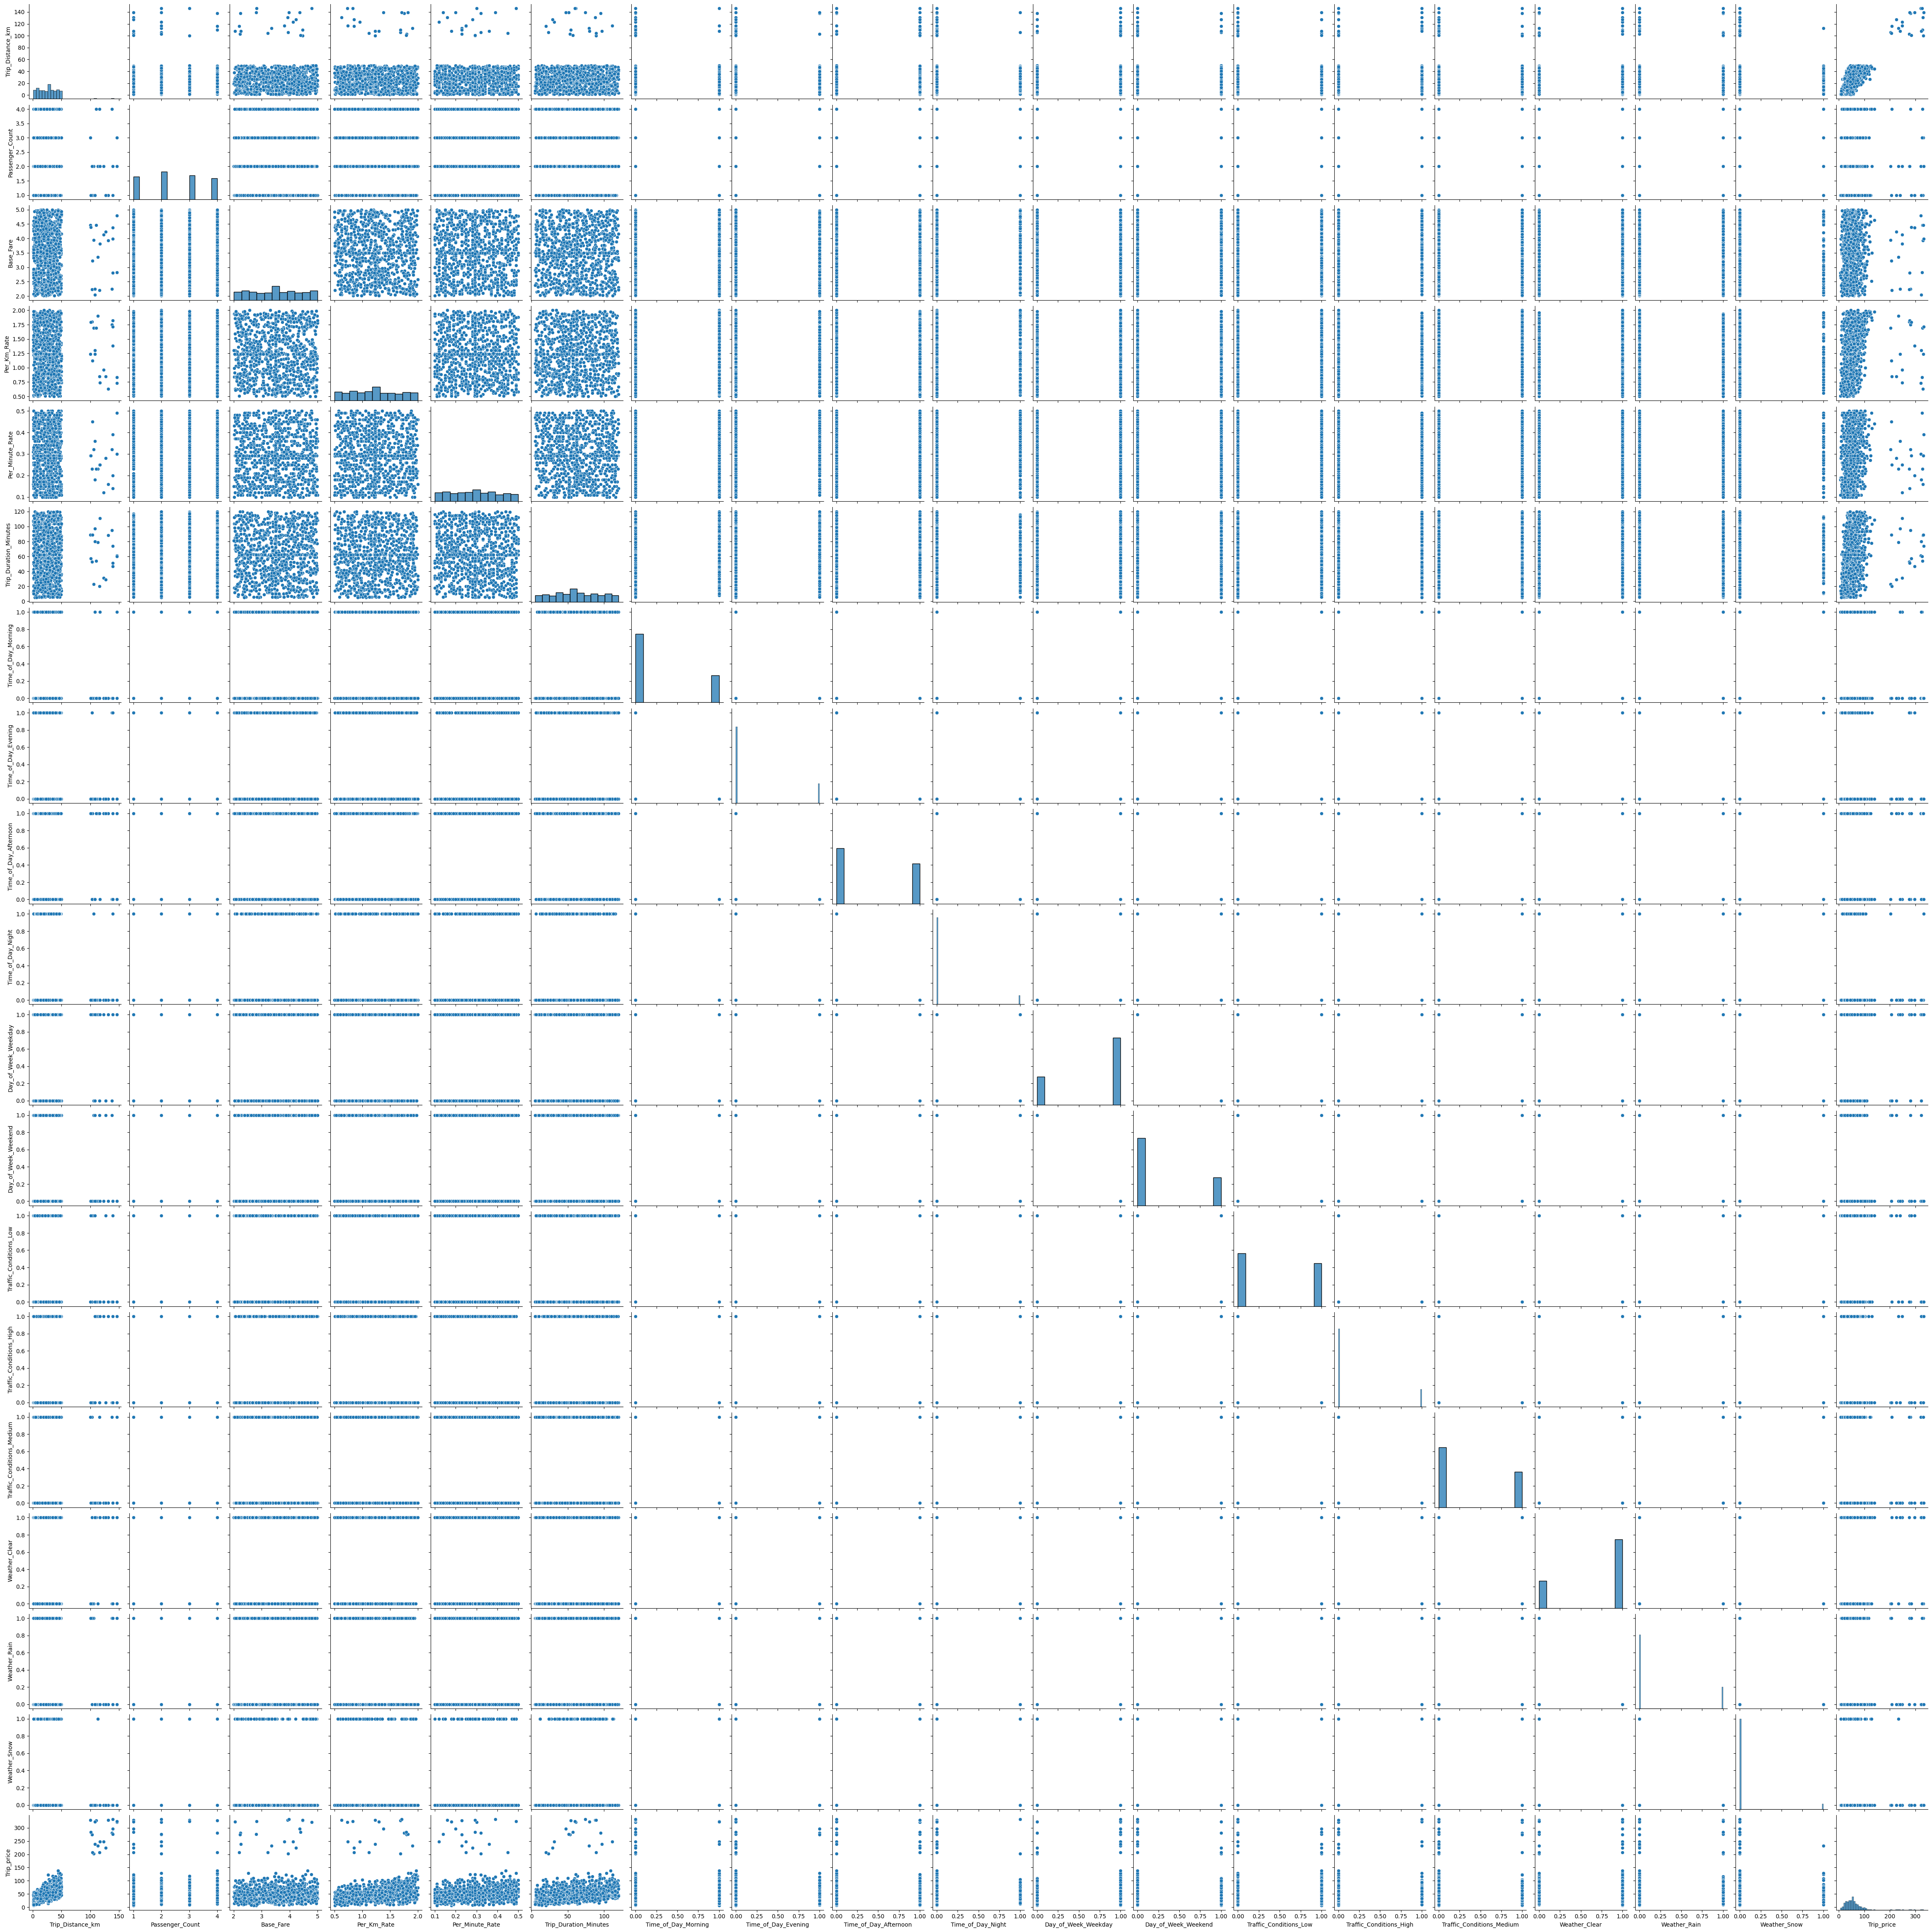

In [52]:
sns.pairplot(df)